In [1]:
import pandas as pd

In [2]:
conversions = pd.read_csv("conversiones.csv")

In [3]:
conversions.head(10)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
5,US,31,0,Seo,1,0
6,China,27,1,Seo,4,0
7,US,23,0,Ads,4,0
8,UK,29,0,Direct,4,0
9,US,25,0,Ads,2,0


In [4]:
conversions.corr().style.background_gradient()

,age,new_user,total_pages_visited,converted
age,1,0.0123426,-0.0459222,-0.0887974
new_user,0.0123426,1,-0.0825415,-0.152374
total_pages_visited,-0.0459222,-0.0825415,1,0.528994
converted,-0.0887974,-0.152374,0.528994,1


According to the correlation matrix, there's a high correlation between the total pages visited (time spent on the platform) and conversion **0.528994**

## Conversion Rate per source

Something that can't be appreciated in the correlation matrix is how _how the client arrived at the site_ affects conversion, for that I'll be getting the conversion rate per type of source to analyze that.

First I get the number of customers per source type:

In [5]:
size_per_group = conversions.groupby(["source"]).size()
size_per_group

source
Ads        88740
Direct     72420
Seo       155040
dtype: int64

Then get the number of customers converted per source type:

In [6]:
size_per_converted_group = conversions.loc[conversions.converted == 1].groupby(["source"]).size()
size_per_converted_group

source
Ads       3060
Direct    2040
Seo       5100
dtype: int64

Then calculate the conversion rate (# converted / total) per source type:

In [7]:
rates = size_per_converted_group / size_per_group
rates

source
Ads       0.034483
Direct    0.028169
Seo       0.032895
dtype: float64

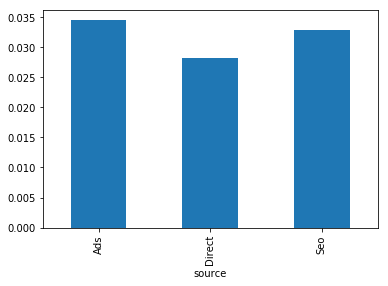

In [8]:
_ = rates.plot.bar()

There isn't an indication that the source type affects converted rate, as all three rates are close to one another.

### How about new users?
Now how about the same type of tests but for new users, to see which source type served to convert the most new users.

In [9]:
new_user_size_per_group_converted = conversions.loc[(conversions.converted == 1) & conversions.new_user == 1].groupby(["source"]).size()
new_user_size_per_group_converted

source
Ads        875
Direct     653
Seo       1511
dtype: int64

In [10]:
new_user_size_per_group = conversions.loc[conversions.new_user == 1].groupby(["source"]).size()
new_user_size_per_group

source
Ads        60849
Direct     49742
Seo       106153
dtype: int64

In [11]:
new_user_rates = new_user_size_per_group_converted / new_user_size_per_group
new_user_rates

source
Ads       0.014380
Direct    0.013128
Seo       0.014234
dtype: float64

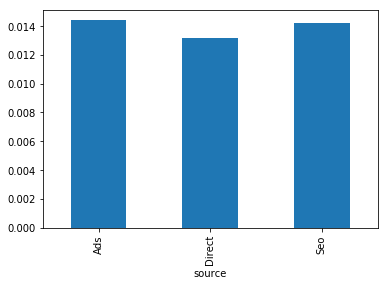

In [12]:
_ = new_user_rates.plot.bar()

No, source type doesn't affect conversion greatly

## Country

In [45]:
country_rate = conversions.loc[conversions.converted == 1].groupby(["country"]).size() / conversions.groupby(["country"]).size()
country_rate

country
China      0.001332
Germany    0.062500
UK         0.052632
US         0.037801
dtype: float64

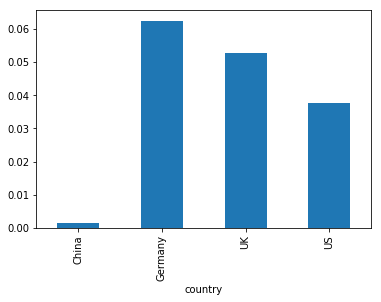

In [42]:
country_rate.plot.bar()

There's not really much difference here between Germany, the UK and the US, but China is falling behind. The platform is not as successful there.

## Age

In [32]:
age_rate = conversions.loc[conversions.converted == 1].groupby(["age"]).size() / conversions.groupby(["age"]).size()
age_rate

age
17     0.071607
18     0.066029
19     0.058616
20     0.057109
21     0.053985
22     0.053243
23     0.047990
24     0.045448
25     0.038782
26     0.039767
27     0.033513
28     0.032564
29     0.033621
30     0.028998
31     0.027461
32     0.024802
33     0.023989
34     0.021556
35     0.018394
36     0.019297
37     0.018953
38     0.014158
39     0.017313
40     0.014270
41     0.012342
42     0.013243
43     0.011623
44     0.009943
45     0.012383
46     0.011356
47     0.007987
48     0.009430
49     0.007366
50     0.005900
51     0.006404
52     0.005348
53     0.003190
54     0.001923
55     0.007614
56          NaN
57          NaN
58     0.012121
59          NaN
60     0.021277
61     0.014085
62          NaN
63          NaN
64          NaN
65          NaN
66          NaN
67          NaN
68          NaN
69          NaN
70          NaN
72          NaN
73          NaN
77          NaN
79          NaN
111    1.000000
123    1.000000
dtype: float64

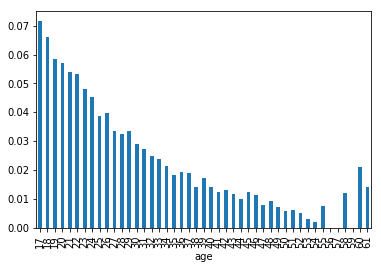

In [39]:
age_rate.loc[0:61].plot.bar()

The younger the audience, the higher the conversion rate.

## Total Pages Visited

In [43]:
pages_rate = conversions.loc[conversions.converted == 1].groupby(["total_pages_visited"]).size() / conversions.groupby(["total_pages_visited"]).size()
pages_rate

total_pages_visited
1          NaN
2     0.000228
3     0.000251
4     0.000780
5     0.001570
6     0.003437
7     0.006769
8     0.015238
9     0.033067
10    0.061184
11    0.123471
12    0.244537
13    0.400825
14    0.587521
15    0.740377
16    0.871818
17    0.923077
18    0.961219
19    0.989381
20    0.997531
21    1.000000
22    1.000000
23    1.000000
24    1.000000
25    1.000000
26    1.000000
27    1.000000
28    1.000000
29    1.000000
dtype: float64

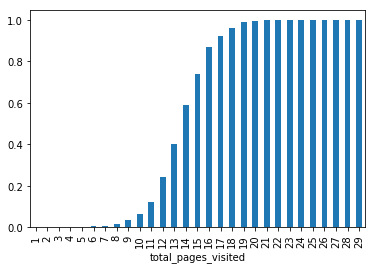

In [44]:
pages_rate.plot.bar()

The longer the period the user spends on the page (the more pages the user visits), the higher the conversion rate.

## Conclusion

The platform should aim to keep users in the site, as that's the strongest variable in relation to conversion according to this analysis, and aim their products or marketing at people (young adults) in the age range of 17 - 25.